## My Capstone Project
#### Covid Analysis Rate by Vaccination & Death (US States)
##### By: Lisa Charles

#### Objective:
* With the recent rise in Covid-19 cases in the US, I felt the need to analyze the increasing rate of Covid infections and deaths in the US. I am hoping to show friends that are on the fence of getting vaccination how quickly and deadly the new strain of Covid is.
I will be looking at Covid 19 vaccintions by State, hospitalizations and death rates.  My goal is to find the coaltion of death with fully vaccinated and non vaccinated persons. Hope I scare friends into rethinking vaccinations

#### Methodology
##### I will be analyzing data from two data sets from the following:
* Dataset: Two data sets one will be looking at vaccinations by state the other will be looking at deaths and hospitalizations
* Data Wrangling & Cleaning: We will be looking at two states with the highest vaccination rate and two with the lowest rates. 
* Filtering & Data Aggragation: We will create new variable with the states that we need and rename fields if needed and finally show the data.
* Data Visulization: We will use Visualization Techniques to show death rates among the states with Highest vaccination rates and the states with the lowest rate and highest deaths.

#### Import Pandas Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [7]:
"""
all-states-history.csv
us_state_vaccinations.csv
"""

'\nall-states-history.csv\nus_state_vaccinations.csv\n'

# Covid Vaccinations by State

In [8]:
covid_vaccinations = pd.read_csv('us_state_vaccinations.csv')
covid_vaccinations.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,1/12/2021,CA,816301.0,3286050.0,703540.0,0.25,2.07,100089.0,1.78,8.32,NaN,NaN,NaN,0.248
1,1/13/2021,CA,891489.0,3435650.0,744545.0,0.34,2.26,133689.0,1.88,8.70,75188.00,75188.0,1903.0,0.259
2,1/14/2021,CA,975293.0,3540175.0,801998.0,NaN,2.47,NaN,2.03,8.96,83804.00,79496.0,2012.0,0.275
3,1/15/2021,CA,1072959.0,3548575.0,865387.0,0.52,2.72,204374.0,2.19,8.98,97666.00,85553.0,2165.0,0.302
4,1/16/2021,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96867.75,88381.0,2237.0,NaN


### Data Wrangling and cleaning
* I will be selecting the fields that i need
* I will be renaming fields
* I will drop na values



In [9]:
# I will rename fields i need
covid_vaccinations.rename({'date':'Date', 'location': 'US State', 'people_fully_vaccinated': '#Of People Fully Vaccinated'},axis=1, inplace=True)
covid_vaccinations


,Date,US State,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,#Of People Fully Vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,1/12/2021,CA,816301.0,3286050.0,703540.0,0.25,2.07,100089.0,1.78,8.32,NaN,NaN,NaN,0.248
1,1/13/2021,CA,891489.0,3435650.0,744545.0,0.34,2.26,133689.0,1.88,8.70,75188.00,75188.0,1903.0,0.259
2,1/14/2021,CA,975293.0,3540175.0,801998.0,NaN,2.47,NaN,2.03,8.96,83804.00,79496.0,2012.0,0.275
3,1/15/2021,CA,1072959.0,3548575.0,865387.0,0.52,2.72,204374.0,2.19,8.98,97666.00,85553.0,2165.0,0.302
4,1/16/2021,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96867.75,88381.0,2237.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,8/1/2021,NY,22997841.0,25121865.0,12301362.0,57.21,118.22,11129951.0,63.23,129.14,47591.00,41172.0,2116.0,0.915
820,8/2/2021,NY,23023551.0,25121865.0,12317987.0,57.27,118.35,11140544.0,63.32,129.14,25710.00,41607.0,2139.0,0.916
821,8/3/2021,NY,23049690.0,25175815.0,12334612.0,57.32,118.49,11150603.0,63.41,129.41,26139.00,39106.0,2010.0,0.916
822,8/4/2021,NY,23091118.0,25195845.0,12361931.0,57.40,118.70,11165792.0,63.55,129.52,41428.00,38648.0,1987.0,0.916


In [10]:
# I will be creating a new variable and select only fields that i need
# Will clean data by dropping the NaN
covidvaxbystate = covid_vaccinations[["Date","US State","#Of People Fully Vaccinated"]]
covidvaxbystate.dropna()


,Date,US State,#Of People Fully Vaccinated
0,1/12/2021,CA,100089.0
1,1/13/2021,CA,133689.0
3,1/15/2021,CA,204374.0
7,1/19/2021,CA,260838.0
8,1/20/2021,CA,273276.0
...,...,...,...
819,8/1/2021,NY,11129951.0
820,8/2/2021,NY,11140544.0
821,8/3/2021,NY,11150603.0
822,8/4/2021,NY,11165792.0


# Covid death by State

In [11]:
# Covid deaths by state
covid_deaths = pd.read_csv('daily-covid-cases-deaths2.csv')
covid_deaths.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
0,7/15/2021,CA,3918996,3760079.0,158917.0,5621,408.0,63909,63909.0,0.0,11,0.0
1,5/20/2020,CA,103545,103403.0,142.0,2773,4.0,3933,3933.0,0.0,89,0.0
2,9/11/2020,ID,34950,32228.0,2722.0,333,48.0,412,375.0,37.0,5,0.0
3,8/12/2020,MS,73809,70690.0,3119.0,717,65.0,2517,2391.0,126.0,19,1.0
4,7/29/2020,CA,562031,560023.0,2008.0,9163,72.0,10397,10397.0,0.0,149,0.0


### Data Cleaning: Rename


In [12]:
# I will rename fields I need for Covid deaths by stae
covid_deaths.rename({'submission_date':'Date','state':'US State','tot_death':'Total Death','new_death':'Death Increase'},axis=1, inplace=True)
covid_deaths


,Date,US State,tot_cases,conf_cases,prob_cases,new_case,pnew_case,Total Death,conf_death,prob_death,Death Increase,pnew_death
0,7/15/2021,CA,3918996,3760079.0,158917.0,5621,408.0,63909,63909.0,0.0,11,0.0
1,5/20/2020,CA,103545,103403.0,142.0,2773,4.0,3933,3933.0,0.0,89,0.0
2,9/11/2020,ID,34950,32228.0,2722.0,333,48.0,412,375.0,37.0,5,0.0
3,8/12/2020,MS,73809,70690.0,3119.0,717,65.0,2517,2391.0,126.0,19,1.0
4,7/29/2020,CA,562031,560023.0,2008.0,9163,72.0,10397,10397.0,0.0,149,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2247,2/19/2020,CA,632,619.0,13.0,16,1.0,151,151.0,0.0,1,0.0
2248,1/13/2021,MS,248655,162515.0,86140.0,1880,1051.0,6155,4467.0,1688.0,37,23.0
2249,7/2/2021,ID,195172,156211.0,38961.0,83,26.0,2158,1880.0,278.0,4,1.0
2250,4/19/2021,CA,3777265,3629347.0,147918.0,1685,140.0,62397,62397.0,0.0,29,0.0


#### Create a new Variable and drop NaN fields

In [13]:
# I will be creating a new variable and select only fields that I need
# Will clean data by dropping NaN values
coviddeathbystate = covid_deaths[["Date","US State","Total Death","Death Increase"]]
coviddeathbystate.dropna()


,Date,US State,Total Death,Death Increase
0,7/15/2021,CA,63909,11
1,5/20/2020,CA,3933,89
2,9/11/2020,ID,412,5
3,8/12/2020,MS,2517,19
4,7/29/2020,CA,10397,149
...,...,...,...,...
2247,2/19/2020,CA,151,1
2248,1/13/2021,MS,6155,37
2249,7/2/2021,ID,2158,4
2250,4/19/2021,CA,62397,29


## Merge the two data sets:
coviddeathbystate
covidvaxbystate ##### We will be using merge and concatenate functions in this section

#### This section will combine the fields that are duplicates: Date and US State

In [14]:

# This section will conbine the fields that are duplicates: Date and US State
pd.merge(
    coviddeathbystate.reset_index(),
    covidvaxbystate.reset_index(),
    on=['Date',"US State"]
)

,index_x,Date,US State,Total Death,Death Increase,index_y,#Of People Fully Vaccinated
0,16,1/23/2021,MS,6489,17,423,13423.0
1,18,3/14/2021,MS,7108,0,473,326212.0
2,28,7/26/2021,MS,7523,5,607,1017233.0
3,29,1/16/2021,MS,6282,40,416,NaN
4,30,6/18/2021,MS,7424,1,569,858625.0
...,...,...,...,...,...,...,...
407,2226,5/4/2021,MS,7321,7,524,723710.0
408,2227,7/20/2021,MS,7485,11,601,1008740.0
409,2240,4/8/2021,MS,7208,0,498,528936.0
410,2245,7/31/2021,MS,7547,2,612,1026837.0


#### This section will join the wto data set columns: covidvaxbystate, and coviddeathbystate

In [15]:
## This section will merge the two data sets: covidvaxbystate, and coviddeathbystate
pd.concat([covidvaxbystate, coviddeathbystate.reindex(covidvaxbystate.index)], axis=1)

,Date,US State,#Of People Fully Vaccinated,Date,US State,Total Death,Death Increase
0,1/12/2021,CA,100089.0,7/15/2021,CA,63909,11
1,1/13/2021,CA,133689.0,5/20/2020,CA,3933,89
2,1/14/2021,CA,NaN,9/11/2020,ID,412,5
3,1/15/2021,CA,204374.0,8/12/2020,MS,2517,19
4,1/16/2021,CA,NaN,7/29/2020,CA,10397,149
...,...,...,...,...,...,...,...
819,8/1/2021,NY,11129951.0,7/17/2021,MS,7465,0
820,8/2/2021,NY,11140544.0,6/16/2021,ID,2122,6
821,8/3/2021,NY,11150603.0,7/11/2020,CA,7965,93
822,8/4/2021,NY,11165792.0,4/18/2020,CA,1415,99


#### This section merges the two datasets, NaN means the data is not available in the other dataset

In [16]:
pd.merge(
    coviddeathbystate.reset_index().tail(5),
    covidvaxbystate.reset_index().head(5),
    how='outer',
    indicator=True)

,index,Date,US State,Total Death,Death Increase,#Of People Fully Vaccinated,_merge
0,2247,2/19/2020,CA,151.0,1.0,NaN,left_only
1,2248,1/13/2021,MS,6155.0,37.0,NaN,left_only
2,2249,7/2/2021,ID,2158.0,4.0,NaN,left_only
3,2250,4/19/2021,CA,62397.0,29.0,NaN,left_only
4,2251,7/27/2020,ID,152.0,6.0,NaN,left_only
5,0,1/12/2021,CA,NaN,NaN,100089.0,right_only
6,1,1/13/2021,CA,NaN,NaN,133689.0,right_only
7,2,1/14/2021,CA,NaN,NaN,NaN,right_only
8,3,1/15/2021,CA,NaN,NaN,204374.0,right_only
9,4,1/16/2021,CA,NaN,NaN,NaN,right_only


In [17]:
result = covidvaxbystate.append(coviddeathbystate, sort=False)

## Visualization
Will use charts to show covid Vaccinations by state & Covid rate of death  

In [18]:
covidanalysis = pd.concat([ coviddeathbystate, covidvaxbystate], ignore_index=True, sort=False)
covidanalysis


,Date,US State,Total Death,Death Increase,#Of People Fully Vaccinated
0,7/15/2021,CA,63909.0,11.0,NaN
1,5/20/2020,CA,3933.0,89.0,NaN
2,9/11/2020,ID,412.0,5.0,NaN
3,8/12/2020,MS,2517.0,19.0,NaN
4,7/29/2020,CA,10397.0,149.0,NaN
...,...,...,...,...,...
3071,8/1/2021,NY,NaN,NaN,11129951.0
3072,8/2/2021,NY,NaN,NaN,11140544.0
3073,8/3/2021,NY,NaN,NaN,11150603.0
3074,8/4/2021,NY,NaN,NaN,11165792.0


<AxesSubplot:xlabel='US State'>

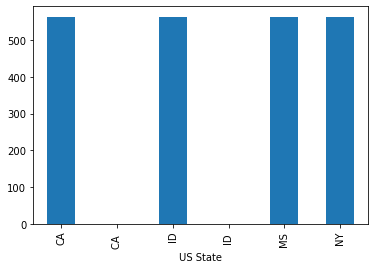

In [19]:
covidanalysis.groupby(['US State'])['Total Death'].count().plot(kind="bar")


<AxesSubplot:>

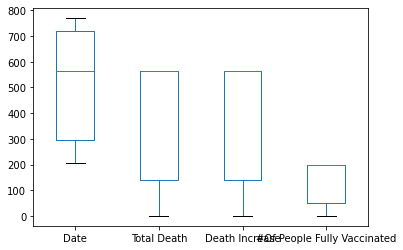

In [24]:
covidanalysis.groupby(['US State']).count().plot(kind="box")


<AxesSubplot:xlabel='Total Death'>

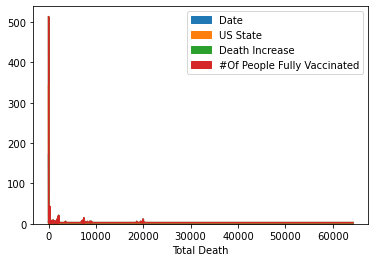

In [32]:
covidanalysis.groupby(['Total Death']).count().plot(kind="area")


In [5]:
covidanalysis.groupby(['US State']).count().plot(kind="area")

NameError: name 'covidanalysis' is not defined